In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1,1)
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [3]:
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [4]:
model = LogisticRegression(solver = 'liblinear',random_state = 0)

In [5]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
model.classes_

array([0, 1])

In [7]:
model.intercept_

array([-1.04608067])

In [8]:
model.coef_

array([[0.51491375]])

In [9]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [10]:
model.score(x,y)

0.9

In [11]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

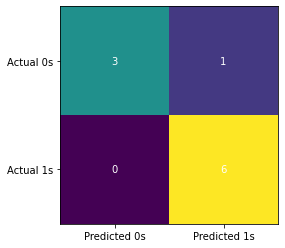

In [22]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize = (4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j,i, cm[i,j], ha = 'center', va = 'center', color = 'white')
plt.show

In [23]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [25]:
# Improve Model
# regularization strength C equal to 10.0 , instead of the default value of 1.0
model = LogisticRegression(solver = 'liblinear', C = 10.0, random_state = 0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [27]:
print('Intercept :', model.intercept_)
print('Coefficient :', model.coef_)
print('Prediction Probability :', model.predict_proba(x))
print('X :', model.predict(x))

Intercept : [-3.51335372]
Coefficient : [[1.12066084]]
Prediction Probability : [[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
X : [0 0 0 0 1 1 1 1 1 1]


In [29]:
model.score(x,y)

1.0

In [30]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [31]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [32]:
#Log Reg with scikit-learn

In [36]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [37]:
model = LogisticRegression(solver = 'liblinear', C=10.0, random_state = 0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [38]:
p_pred = model.predict_proba(x)
p_pred

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [39]:
y_pred = model.predict(x)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [40]:
score_ = model.score(x, y)
score_

1.0

In [41]:
conf_m = confusion_matrix(y, y_pred)
conf_m

array([[4, 0],
       [0, 6]], dtype=int64)

In [42]:
report = classification_report(y, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         4\n           1       1.00      1.00      1.00         6\n\n    accuracy                           1.00        10\n   macro avg       1.00      1.00      1.00        10\nweighted avg       1.00      1.00      1.00        10\n'

In [43]:
print('x:', x, sep='\n')
print('y:', y, sep='\n', end='\n\n')
print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y:
[0 0 0 0 1 1 1 1 1 1]

intercept: [-3.51335372]
coef: [[1.12066084]]

p_pred:
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]

y_pred: [0 0 0 0 1 1 1 1 1 1]

score_: 1.0

conf_m:
[[4 0]
 [0 6]]

report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [46]:
# Logistic Regression with StatsModels:
import numpy as np
import statsmodels.api as sm

In [51]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

In [52]:
print(x)
print(y)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
[0 1 0 0 1 1 1 1 1 1]


In [53]:
model = sm.Logit(y,x)

In [54]:
result = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [55]:
result.params

array([-1.972805  ,  0.82240094])

In [56]:
result.predict

<bound method Results.predict of <statsmodels.discrete.discrete_model.LogitResults object at 0x00000136995FA610>>

In [57]:
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [58]:
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Nov 2022   Pseudo R-squ.:                  0.4263
Time:                        23:32:45   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""